Final Project - Data Mining & Business Intelligence - Janna Schlageter

In [53]:
from pathlib import Path

!pip install dmba

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sn

import dmba

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Connecting to Data

In [55]:
path='/content/drive/My Drive/Data Upload/SalesOfMedicalDevices.xlsx'
MedSales_df = pd.read_excel(path)
MedSales_df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction
0,1,2009,1,2,3,-1
1,1,2010,1,1,3,-1
2,1,2011,1,2,0,1
3,1,2012,3,2,0,1
4,1,2013,3,3,3,1


Exploring Data

In [56]:
MedSales_df.describe()

,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,24.000000,2015.000000,1.415712,1.543372,1.392799,-0.121113
std,13.575774,3.744723,1.318475,1.136287,1.331663,0.738893
min,1.000000,2009.000000,0.000000,0.000000,0.000000,-1.000000
25%,12.000000,2012.000000,0.000000,1.000000,0.000000,-1.000000
50%,24.000000,2015.000000,1.000000,2.000000,1.000000,0.000000
75%,36.000000,2018.000000,3.000000,3.000000,3.000000,0.000000
max,47.000000,2021.000000,5.000000,3.000000,4.000000,1.000000


In [57]:
MedSales_df.dtypes

Customer                int64
year                    int64
NoOfSalesCalls          int64
NoOfTargetedEmails      int64
NoOfSales               int64
CustomerSatisfaction    int64
dtype: object

In [58]:
MedSales_df["CustomerSatisfaction"].value_counts()

 0    269
-1    208
 1    134
Name: CustomerSatisfaction, dtype: int64

Rename Columns

In [59]:
# Rename columns: for identical format
MedSales_df = MedSales_df.rename(columns={'year': 'Year'})
MedSales_df.head()

,Customer,Year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction
0,1,2009,1,2,3,-1
1,1,2010,1,1,3,-1
2,1,2011,1,2,0,1
3,1,2012,3,2,0,1
4,1,2013,3,3,3,1


Predictor and Outcome variables 

In [60]:
predictors = ['Customer', 'Year', 'NoOfSalesCalls', 'NoOfTargetedEmails', 'NoOfSales']
outcome = 'CustomerSatisfaction'

Normalization

In [61]:
norm_df = (MedSales_df - MedSales_df.mean()) / MedSales_df.std()
norm_df.head()

,Customer,Year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction
0,-1.694194,-1.602255,-0.315298,0.401860,1.206913,-1.189464
1,-1.694194,-1.335212,-0.315298,-0.478199,1.206913,-1.189464
2,-1.694194,-1.068170,-0.315298,0.401860,-1.045910,1.517287
3,-1.694194,-0.801127,1.201607,0.401860,-1.045910,1.517287
4,-1.694194,-0.534085,1.201607,1.281919,1.206913,1.517287


Visualizing Data

Bar graph of customers and their average satisfaction

Text(0, 0.5, 'Customer Satisfaction')

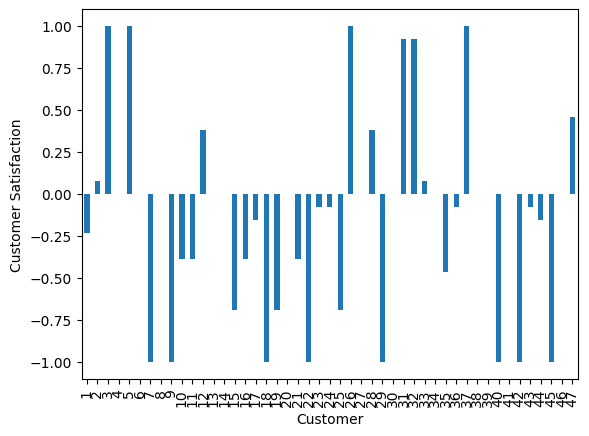

In [63]:
ax = MedSales_df.groupby('Customer').mean().CustomerSatisfaction.plot(kind='bar')
ax.set_ylabel('Customer Satisfaction')

Heat Map of correlations

<Axes: >

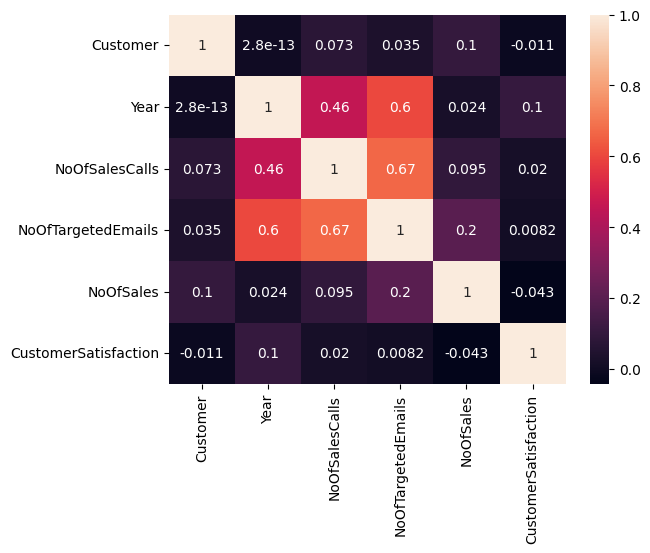

In [65]:
corr = MedSales_df.corr()
sn.heatmap(corr, annot = True)

Histogram of Customer Satisfaction

Text(0, 0.5, 'Count')

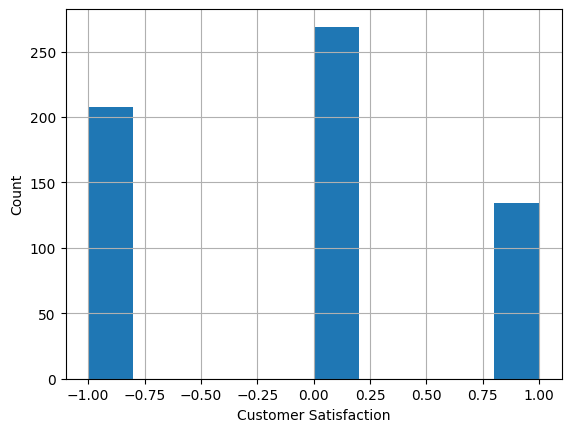

In [66]:
ax = MedSales_df.CustomerSatisfaction.hist() 
ax.set_xlabel('Customer Satisfaction'); 
ax.set_ylabel('Count')

Classification Tree

In [68]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
import matplotlib.pylab as plt 
from dmba import plotDecisionTree, classificationSummary

In [70]:
MedSales_df.CustomerSatisfaction = MedSales_df.CustomerSatisfaction.astype('category')

Partition Data

In [89]:
X = MedSales_df.drop(columns=['CustomerSatisfaction'])
y = MedSales_df['CustomerSatisfaction']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

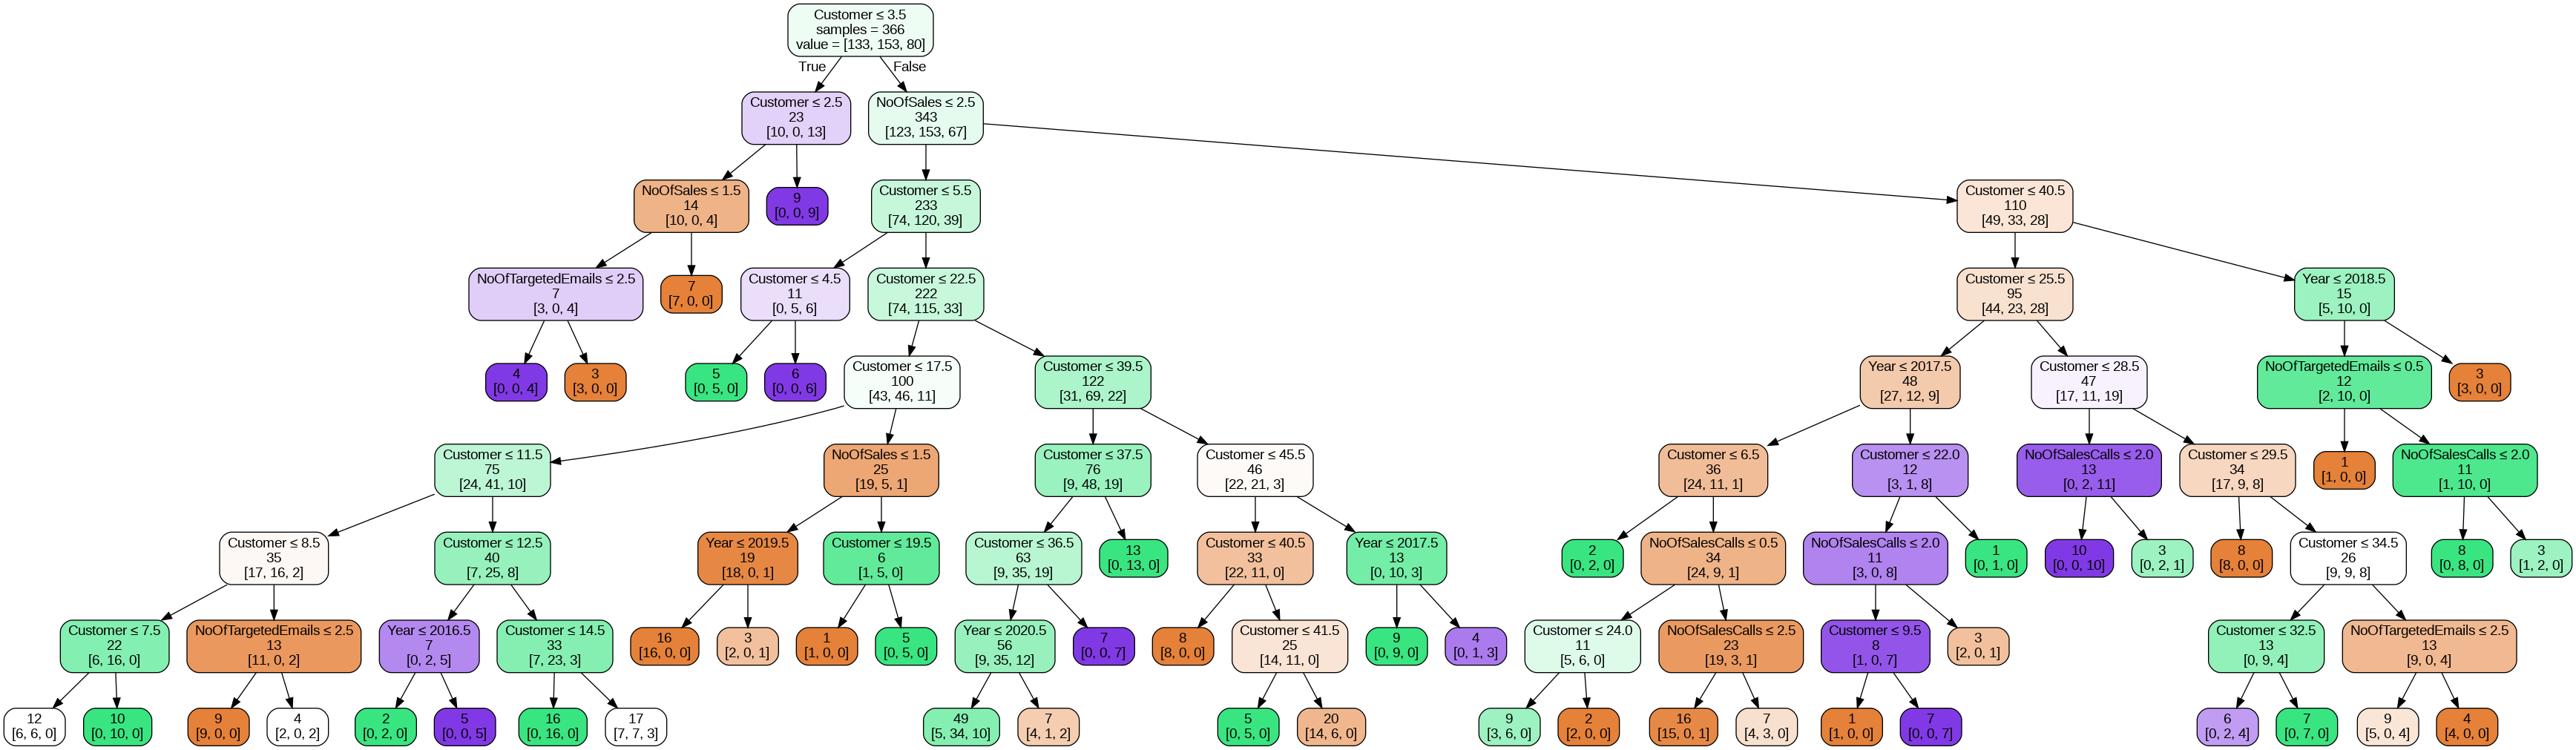

In [133]:
smallClassTree = DecisionTreeClassifier(max_depth=8, min_samples_split=5, min_impurity_decrease=0.00001)
smallClassTree.fit(train_X, train_y)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [134]:
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8361)

       Prediction
Actual   0   1   2
     0 124   9   0
     1  23 127   3
     2  14  11  55
Confusion Matrix (Accuracy 0.7265)

       Prediction
Actual  0  1  2
     0 63  9  3
     1 26 86  4
     2 12 13 29


Clustering

In [175]:
from sklearn.cluster import KMeans

In [187]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(norm_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [188]:
# distances of each record to the cluster centers
distances = kmeans.transform(norm_df)
# find closest cluster for each record
minSquaredDistances = distances.min(axis=1) ** 2
# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, index=norm_df.index)
# group by cluster and print information
for cluster, data in df.groupby('cluster'): 
  count = len(data)
  withinClustSS = data.squaredDistance.sum() 
  print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (50 members): 147.91 within cluster 
Cluster 1 (52 members): 98.79 within cluster 
Cluster 2 (63 members): 124.85 within cluster 
Cluster 3 (79 members): 194.15 within cluster 
Cluster 4 (52 members): 94.45 within cluster 
Cluster 5 (40 members): 44.92 within cluster 
Cluster 6 (55 members): 132.66 within cluster 
Cluster 7 (84 members): 150.38 within cluster 
Cluster 8 (80 members): 207.31 within cluster 
Cluster 9 (56 members): 128.87 within cluster 
